In [1]:
using QuadGK, Polynomials, Plots

## Zadanie 1 - wielomiany Legendre'a

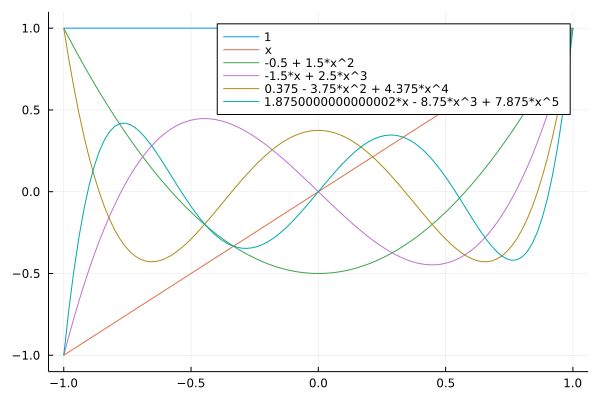

In [58]:
functions = Vector{Function}()
p0 = Polynomial([1])
p1 = Polynomial([0,1])
p2 = 3/2*p1*p1 - 1/2*p0
p3 = 5/3*p1*p2 - 2/3*p1
p4 = 7/4*p1*p3 - 3/4*p2
p5 = 9/5*p1*p4 - 4/5*p3
xs = -1:1
plot(p0,extrema(xs)...)
plot!(p1,extrema(xs)...)
plot!(p2,extrema(xs)...)
plot!(p3,extrema(xs)...)
plot!(p4,extrema(xs)...)
plot!(p5,
    extrema(xs)...,
    ylim = (-1.1,1.1))

In [3]:
println(roots(p2))
(abscissa, coeffs) = gauss(Float64,2)
println(abscissa)
println(roots(p3))
(abscissa, coeffs) = gauss(Float64,3)
println(abscissa)
println(roots(p4))
(abscissa, coeffs) = gauss(Float64,4)
println(abscissa)

[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]
[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


Odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą $w(x)$ w $[a,b]$ są zerami wielomianu ortogonalnego $\phi_{n}(x)$ dla tego samego przedziału i tej samej funkcji ważącej.

## Zadanie 2 - liczenie całki metodą Gaussa

In [4]:
function gaussIntegral(k,f)
    (roots, coeffs) = gauss(k)
    return sum(coeffs.*f.(roots))
end

gaussIntegral (generic function with 1 method)

In [5]:
test = [[if j != i  0 else i end for i in 1:j] for j in 1:10]

for i in 1:10
    poly = Polynomial(test[i])
    println("Polynomial level: $(i) Calc: $(gaussIntegral(3,poly)) Expected: $(1^length(poly) - ((-1)^length(poly)))")
end

Polynomial level: 1 Calc: 1.9999999999999998 Expected: 2
Polynomial level: 2 Calc: 0.0 Expected: 0
Polynomial level: 3 Calc: 2.0 Expected: 2
Polynomial level: 4 Calc: 0.0 Expected: 0
Polynomial level: 5 Calc: 2.0 Expected: 2
Polynomial level: 6 Calc: 0.0 Expected: 0
Polynomial level: 7 Calc: 1.6800000000000006 Expected: 2
Polynomial level: 8 Calc: 0.0 Expected: 0
Polynomial level: 9 Calc: 1.2960000000000005 Expected: 2
Polynomial level: 10 Calc: 0.0 Expected: 0


Funkcja przestaje być dokładna przy stopniu wielomianu równym 7. Wynika to z twierdzenia o stopniu dokładności kwadratury Gaussa - jest ona dokładna dla wielomianu o stopniu równym maksymalnie $2n -1$, zatem dla kwadratury równej 3 dokładność kończy się na wielomianie stopnia 5.

## Zadanie 3 - obliczanie całek

In [6]:
function overallIntegral(k,f,a,b)
    (roots,coeffs) = gauss(k)
    roots = (b-a)/2 * roots .+ (b+a)/2
    value = (b-a)/2 * sum(coeffs.*f.(roots))
    return value
end

overallIntegral (generic function with 1 method)

In [7]:
test1 = Polynomial([0,2,1])
for i in 1:5
    println("Quadrade: $(i) Function: $(test1) Interval: [0,4] Expected: 37.33 Got: $(overallIntegral(i,test1,0,4))")
end

Quadrade: 1 Function: 2*x + x^2 Interval: [0,4] Expected: 37.33 Got: 32.0
Quadrade: 2 Function: 2*x + x^2 Interval: [0,4] Expected: 37.33 Got: 37.33333333333333
Quadrade: 3 Function: 2*x + x^2 Interval: [0,4] Expected: 37.33 Got: 37.33333333333333
Quadrade: 4 Function: 2*x + x^2 Interval: [0,4] Expected: 37.33 Got: 37.333333333333336
Quadrade: 5 Function: 2*x + x^2 Interval: [0,4] Expected: 37.33 Got: 37.33333333333332


In [8]:
test2 = exp
for i in 1:5
    println("Quadrade: $(i) Function: $(test2) Interval: [0,1] Expected: 1,7183 Got: $(overallIntegral(i,exp,0,1))")
end

Quadrade: 1 Function: exp Interval: [0,1] Expected: 1,7183 Got: 1.6487212707001282
Quadrade: 2 Function: exp Interval: [0,1] Expected: 1,7183 Got: 1.7178963780075036
Quadrade: 3 Function: exp Interval: [0,1] Expected: 1,7183 Got: 1.7182810043725216
Quadrade: 4 Function: exp Interval: [0,1] Expected: 1,7183 Got: 1.7182818275260778
Quadrade: 5 Function: exp Interval: [0,1] Expected: 1,7183 Got: 1.7182818284583912


In [9]:
test3 = cos
for i in 1:5
    println("Quadrade: $(i) Function: $(test3) Interval: [-1,1] Expected: 1,6829 Got: $(overallIntegral(i,cos,-1,1))")
end

Quadrade: 1 Function: cos Interval: [-1,1] Expected: 1,6829 Got: 2.0
Quadrade: 2 Function: cos Interval: [-1,1] Expected: 1,6829 Got: 1.6758236553899857
Quadrade: 3 Function: cos Interval: [-1,1] Expected: 1,6829 Got: 1.6830035477269165
Quadrade: 4 Function: cos Interval: [-1,1] Expected: 1,6829 Got: 1.6829416886959732
Quadrade: 5 Function: cos Interval: [-1,1] Expected: 1,6829 Got: 1.6829419704071917


## Zadanie 4 - całkowanie Gauss-Kronroda

In [10]:
testFunction = Polynomial([1,5,2,3])
println("Function: $(testFunction) Interval: [-5,5]")
println("Expected: 176,67 Got: $(quadgk(testFunction,-5,5)[1])")

Function: 1 + 5*x + 2*x^2 + 3*x^3 Interval: [-5,5]
Expected: 176,67 Got: 176.66666666666643


In [11]:
gaussFunction(x) = 1/sqrt(2*pi)*exp((-x^2)/2)
println("Function: $(gaussFunction) Interval: [-inf,inf]")
println("Expected: 1 Got: $(quadgk(gaussFunction,-Inf,Inf)[1])")

Function: gaussFunction Interval: [-inf,inf]
Expected: 1 Got: 1.0000000000032583


## Zadanie 5 - całkowanie podstawowe

In [16]:
function rectangle(f, a, b, n)
    h = (b-a)/n
    value = 0
    for i in 1:1:n
        value += f(a+(i-0.5)*h)
    end
    return value * h
end

function trapeze(f, a, b, n)
    h = (b-a)/n
    value = 0
    for j in 1:1:n-1
        value += f(a + j * h)
    end
    value = (value + (a+b)/2)*h 
    return value
end
function simpson(f, a, b, n)
    value  = 0
    st = 0
    h = (b-a)/n
    for i in 1:n
        x = a + i * h
        st += f(x - h / 2)
        if i < n 
            value += f(x)
        end
    end
    value = h / 6 * (f(a) + f(b) + 2 * value + 4 * st)
    return value
end
testFunction1(x) = 3^x
interval1 = (1,5)
expected = 218.46
xs = Vector{Float64}()
rectangleError = Vector{Float64}()
trapezzeError = Vector{Float64}()
simpsonError = Vector{Float64}()
n = 1
while n <= 100
    append!(xs,4/n)
    append!(rectangleError,abs(expected-rectangle(testFunction1,1,5,n)))
    append!(trapezzeError,abs(expected-trapeze(testFunction1,1,5,n)))
    append!(simpsonError,abs(expected-simpson(testFunction1,1,5,n)))
    n += 1
end
testFunction2 = sin
interval2 = (0,2*pi)
expected2 = 0
xs2 = Vector{Float64}()
rectangleError2 = Vector{Float64}()
trapezzeError2 = Vector{Float64}()
simpsonError2 = Vector{Float64}()
n = 1
while n <= 100
    append!(xs2,2*pi/n)
    append!(rectangleError2,abs(expected2-rectangle(testFunction2,0,2*pi,n)))
    append!(trapezzeError2,abs(expected2-trapeze(testFunction2,0,2*pi,n)))
    append!(simpsonError2,abs(expected2-simpson(testFunction2,0,2*pi,n)))
    n += 1
end

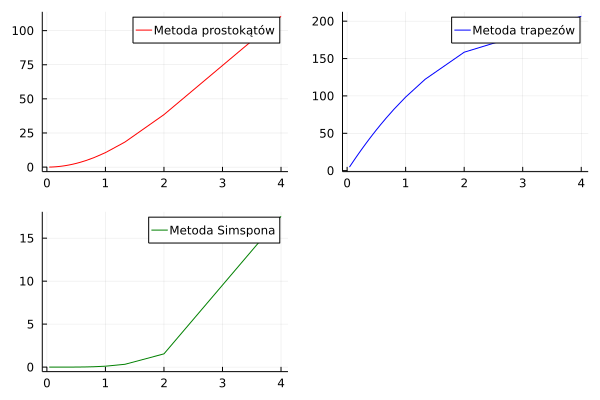

In [17]:
plot(
    xs,
    [rectangleError, trapezzeError, simpsonError],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    color = ["red" "blue" "green"],
    layout=3
)

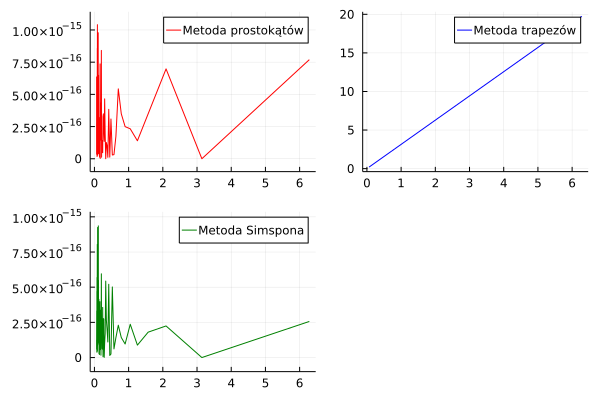

In [18]:
plot(
    xs2,
    [rectangleError2, trapezzeError2, simpsonError2],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    color = ["red" "blue" "green"],
    layout=3
)